# Exploratory Data Analysis (EDA)

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/amazon_reviews.txt', sep='\t')
df['LABEL'] = df['LABEL'].map({'__label1__': 'fake', '__label2__': 'real'})
df.head(3)

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,fake,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,fake,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,fake,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...


As we can see the dataset is completely balanced. label 1 if for fake reviews, label 2 for real reviews. As we can see there are no null values.

In [114]:
df['LABEL'].value_counts()

LABEL
fake    10500
real    10500
Name: count, dtype: int64

In [115]:
df['PRODUCT_CATEGORY'].value_counts()

PRODUCT_CATEGORY
PC                        700
Wireless                  700
Watches                   700
Musical Instruments       700
Home Entertainment        700
Pet Products              700
Lawn and Garden           700
Apparel                   700
Video Games               700
Luggage                   700
Outdoors                  700
Shoes                     700
Home Improvement          700
Tools                     700
Video DVD                 700
Grocery                   700
Books                     700
Jewelry                   700
Home                      700
Sports                    700
Camera                    700
Electronics               700
Furniture                 700
Kitchen                   700
Toys                      700
Health & Personal Care    700
Beauty                    700
Office Products           700
Baby                      700
Automotive                700
Name: count, dtype: int64

In [116]:
df.isnull().sum()

DOC_ID               0
LABEL                0
RATING               0
VERIFIED_PURCHASE    0
PRODUCT_CATEGORY     0
PRODUCT_ID           0
PRODUCT_TITLE        0
REVIEW_TITLE         0
REVIEW_TEXT          0
dtype: int64

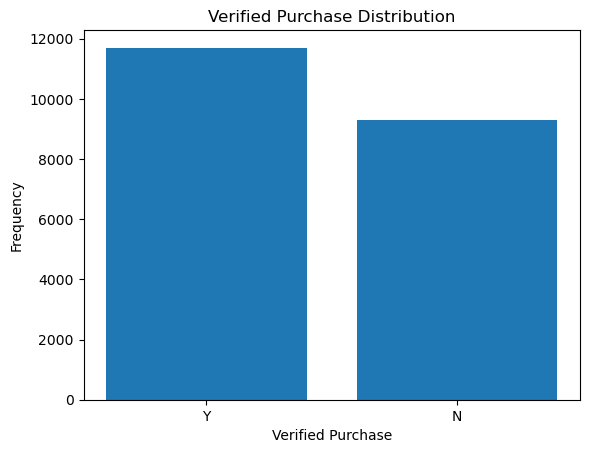

In [117]:
verified = df['VERIFIED_PURCHASE'].value_counts()
plt.bar(verified.index, verified.values)
plt.xlabel('Verified Purchase')
plt.ylabel('Frequency')
plt.title('Verified Purchase Distribution')
plt.show()

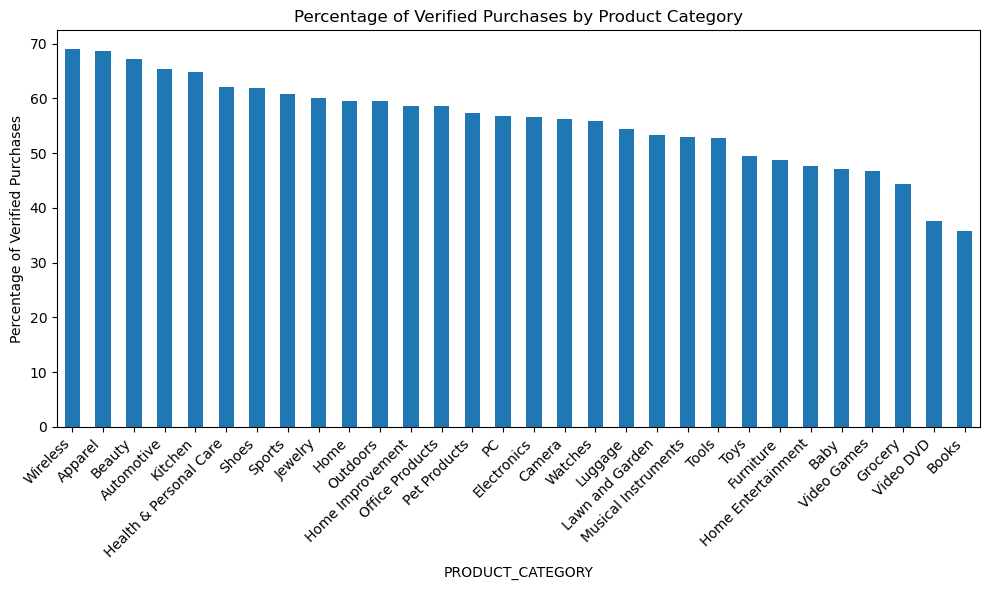

In [118]:
total_products_per_category = df.groupby('PRODUCT_CATEGORY')['PRODUCT_ID'].count()
verified_purchase_per_category = df[df['VERIFIED_PURCHASE'] == 'Y'].groupby('PRODUCT_CATEGORY')['VERIFIED_PURCHASE'].count()

percentage_verified_purchase = (verified_purchase_per_category / total_products_per_category) * 100
percentage_verified_purchase = percentage_verified_purchase.sort_values(ascending=False)

percentage_verified_purchase.plot(kind='bar', figsize=(10,6))
plt.ylabel('Percentage of Verified Purchases')
plt.title('Percentage of Verified Purchases by Product Category')
plt.xticks(rotation=45, ha='right')  # Rotate x labels if needed for better readability
plt.tight_layout()
plt.show()

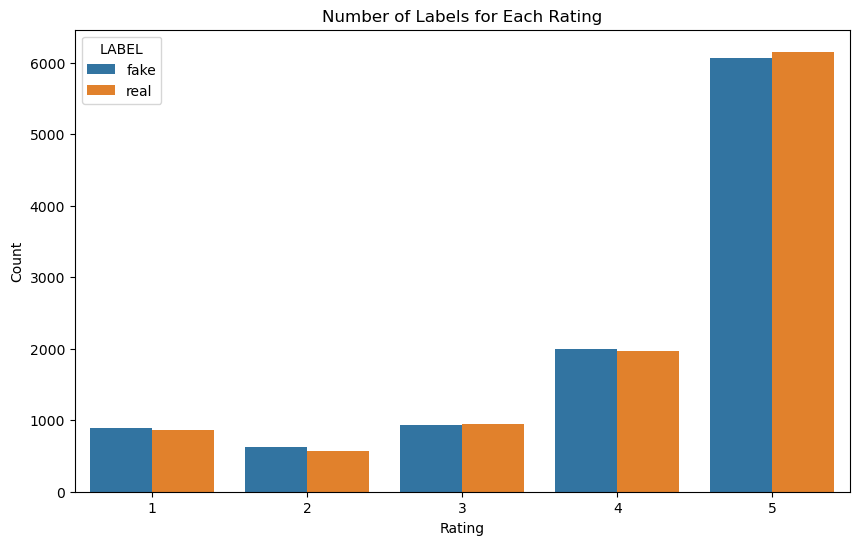

In [119]:
import seaborn as sns
count_df = df.groupby(['RATING', 'LABEL']).size().reset_index(name='COUNT')

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='RATING', y='COUNT', hue='LABEL', data=count_df)
plt.title('Number of Labels for Each Rating')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

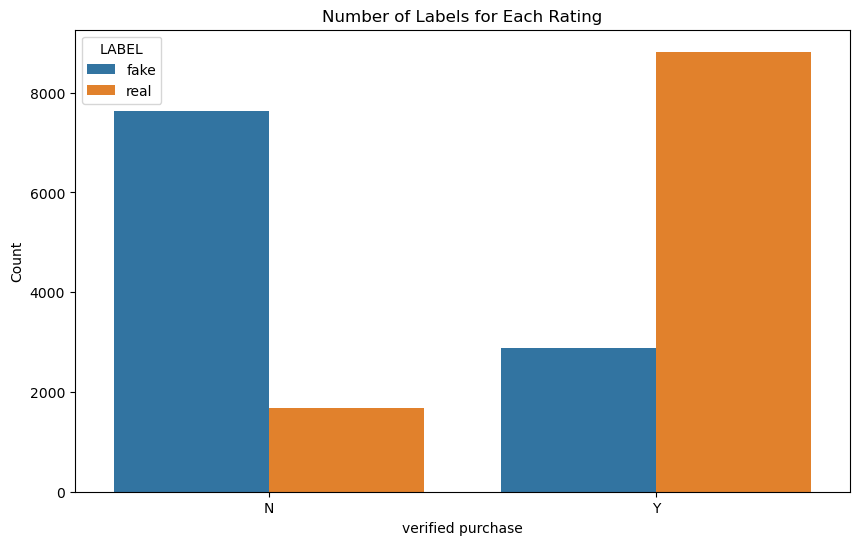

In [120]:
count_df = df.groupby(['VERIFIED_PURCHASE', 'LABEL']).size().reset_index(name='COUNT')

# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='VERIFIED_PURCHASE', y='COUNT', hue='LABEL', data=count_df)
plt.title('Number of Labels for Each Rating')
plt.ylabel('Count')
plt.xlabel('verified purchase')
plt.show()

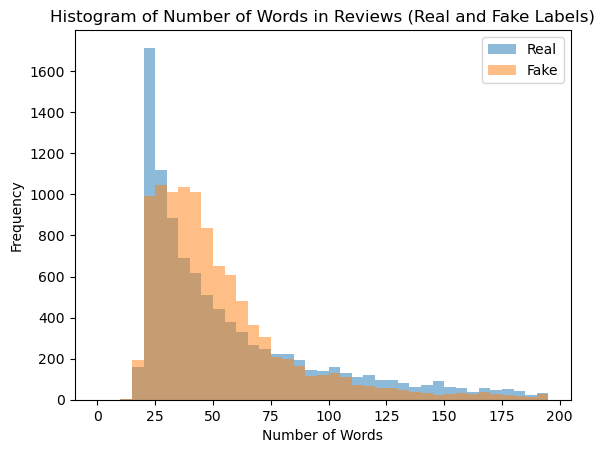

In [142]:
real_word_counts = df[df['LABEL'] == 'real']['REVIEW_TEXT'].apply(lambda x: len(x.split()))
fake_word_counts = df[df['LABEL'] == 'fake']['REVIEW_TEXT'].apply(lambda x: len(x.split()))

# Create a histogram of the number of words in reviews with real and fake labels
plt.hist(real_word_counts, bins=range(0, 200, 5), alpha=0.5, label='Real')
plt.hist(fake_word_counts, bins=range(0, 200, 5), alpha=0.5, label='Fake')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Reviews (Real and Fake Labels)')
plt.legend()
plt.show()

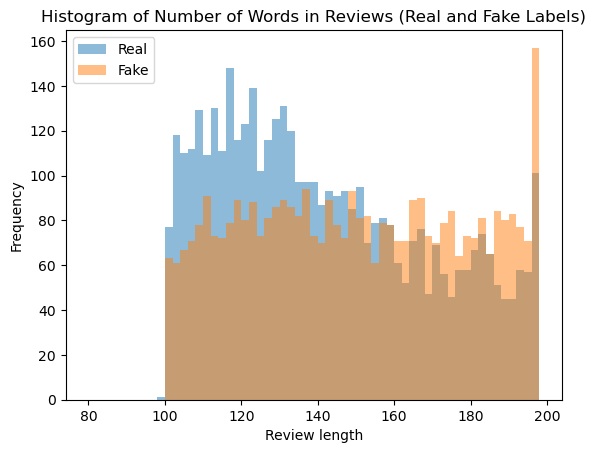

In [141]:
\df['REVIEW_LENGTH'] = df['REVIEW_TEXT'].apply(len)
real_review_lengths = df[df['LABEL'] == 'real']['REVIEW_LENGTH']
fake_review_lengths = df[df['LABEL'] == 'fake']['REVIEW_LENGTH']

# Create a histogram of the number of words in reviews with real and fake labels
plt.hist(real_review_lengths, bins=range(80, 200, 2), alpha=0.5, label='Real')
plt.hist(fake_review_lengths, bins=range(80, 200, 2), alpha=0.5, label='Fake')
plt.xlabel('Review length')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Words in Reviews (Real and Fake Labels)')
plt.legend()
plt.show()